# Task -10 ML Facial Recognition To detect Mood and Suggest Songs accordingly

# LetsGrowMoe Data Science Intern May 2022

# Part 2- Testing Model

# Installing Libraries

In [1]:
pip install mtcnn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from mtcnn import MTCNN
from tensorflow.keras.models import load_model

# Loading Model

In [3]:
model = load_model('C:/Users/HP/OneDrive/Desktop/Internship projects/LGMVIP-Data-Science-Internship/model_optimal.h5')
print('Model loaded successfully')

Model loaded successfully


# Test Image

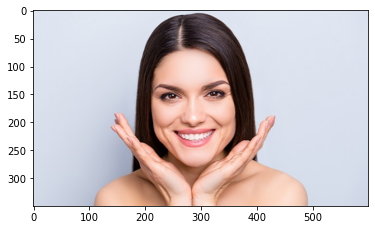

In [4]:
img = 'https://static-bebeautiful-in.unileverservices.com/Unlock-flawless-skin_MobileHomeFeature.jpg'
try:
    image = plt.imread(img)
except SyntaxError:
    image = plt.imread(img,format = 'jpg')
    plt.imshow(image)

# Detecting Face

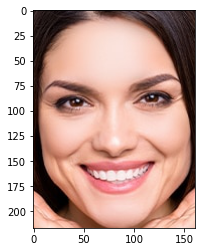

In [5]:
detect = MTCNN()
results = detect.detect_faces(image)
x1,y1,width,height = results[0]['box']
x2,y2 = x1+width,y1+height

face = image[y1:y2,x1:x2]
plt.imshow(face)

# Resizing Image

In [6]:
test_image = np.resize(face,(224,224,1))

# Predicting

In [7]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}
test_img = np.expand_dims(test_image,axis=0)
test_img = test_img.reshape(1,224,224,1)
result = model.predict(test_img)
result = list(result[0])
img_index = result.index(max(result))
emotion = label_dict[img_index]
print(emotion)

Happy


# Song Suggesting as per mood

In [8]:
from IPython.display import Audio
from IPython.core.display import display
def song():
    display(Audio('C:/Users/HP/OneDrive/Desktop/Internship projects/LGMVIP-Data-Science-Internship/LGM Task-10 ML Facial recognition to detect mood and suggest songs accordingly/Happy song.mp3',autoplay=True))
song();